# $B_s^0$ Decay

### Task

* Plot the mass of the muon, $J/\psi$, $\phi$ meson, and $B_s^0$ in order to confirm that the fake data generated is accurate
* Redefine the four vector of the $K^+$ as a proton
* Plot the mass of the fake proton, $K^-$ and $J/\psi$ to see if we get a mass consistent with LHCb's plotted mass of the $\Lambda_b^0$ (about 5.602 GeV)

$B_s^0$ is a meson, meaning it is made up of a quark and an antiquark 
* Mass = 5.367 GeV
* Composition = strange and anti bottom quark

* Decays into $J/\psi$ and $\phi$

$\phi$ is a meson
* Mass = 1.602 GeV
* Composition = strange quark and antistrange quark
* Decays into a $K^+$ and $K^-$

$J/\psi$ - J/psi meson or psion
* Mass = 3.096 GeV
* Composition = charm + anti-charm quark
* Decays into $\mu^+$ and $\mu^-$

$K^-$ is the anti-particle of the Kaon or K Meson
* Mass = 0.494 GeV
* Composition = anti-up + strange quark

$\mu^-$ is an unstable subatomic particle, classified as a lepton
* Mass = 0.105658 GeV

$$B_s^0 \rightarrow J/\psi + \phi$$

$$J/\psi \rightarrow \mu^+ + \mu^-$$

$$\phi \rightarrow K^+ + K^-$$

$$B_s^0 \rightarrow \mu^+ + \mu^- + K^+ + K^-$$

We think that it is possible that LHCb is mistaking a $\Lambda_b^0$ for a $B_s^0$. A $B_s^0$ has a mass of 5.367 GeV while the mass of the $\Lambda_b^0$ is 5.602 GeV. One decay of a $B_s^0$ yields a $J/\psi$ and $\phi$. There is a slight chance that the $J/\psi$ can decay into a proton and an antiproton. For the purposes of this analysis, we are going to continue looking at the J/psi decay into a muon and antimuon. The phi meson which has a mass of 1.02 GeV decays into a $K^+$ and $K^-$. Looking at the full decay of the $B_s^0$, then the decay products are a muon, antimuon, kaon and antikaon. We think that it’s possible that the $K^+$ could be mistaken for a proton, producing a fake $\Lambda_b^0$ that is actually a $B_s^0$.

Decay in Paper $$\Lambda_b^0 \rightarrow P_c^+ + K^-$$
$$\Lambda_b^0 \rightarrow J/\psi + p + K^-$$
$$\Lambda_b^0 \rightarrow \mu^+ + \mu^- + p + K$$

If the decay is actually a strange b meson, then this is the mistake they could have made...

$$B_s^0 \rightarrow \mu^+ + \mu^- + p + K^-$$

If the plotted mass is around 5.602 GeV, then this would then lead to the conclusion that the strange b meson is a neutral lambda b baryon which would not be true!

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pylab as plt
import lhcb_tools as lhcb
%matplotlib inline

In [2]:
def mass(p4):
    E,px,py,pz = p4[0:4]
    m = (E**2-(px**2+py**2+pz**2))
    if m>=0:
        return sqrt(m)
    else:
        return sqrt(-m)
    
def add_4_vecs(p4s):
    E,px,py,pz = (0,0,0,0)

    for p4 in p4s:
        E += p4[0]
        px += p4[1]
        py += p4[2]
        pz += p4[3]

    p4tot = [E,px,py,pz]    
    return p4tot

def redefine_4_vec(p4,newmass):
    px = p4[1]
    py = p4[2]
    pz = p4[3]
    newE = np.sqrt(newmass*newmass + px*px + py*py + pz*pz)
    return [newE,px,py,pz]

In [3]:
infile = open('ToyMC_LHCb_BstoJpsiphi.dat')

kaon_mass1 = []
kaon_mass2 = []
muon_mass1 = []
muon_mass2 = []
phi_mass = []
jpsi_mass = []
sbm_mass = [] # Strange b meson

fake_phi_mass = []
fake_lambda_b_mass = []
pq_mass = []
particle_x_mass = []

x_values = []
y_values = []

collisions = lhcb.get_collisions(infile,False)
print len(collisions)

for collision in collisions:
    
    pions,kaons,protons,muons,neutrinos,photons = collision
    
    kaon_p41 = kaons[0][0:4]
    mkaon1 = mass(kaon_p41)
    kaon_mass1.append(mkaon1)
    #print kaon_mass1[0]
    
    kaon_p42 = kaons[1][0:4]
    mkaon2 = mass(kaon_p42)
    kaon_mass2.append(mkaon2)
    #print kaon_mass2[0]
    
    muon_p41 = muons[0][0:4]
    mmuon1 = mass(muon_p41)
    muon_mass1.append(mmuon1)
    #print muon_mass1[0]
    
    muon_p42 = muons[1][0:4]
    mmuon2 = mass(muon_p42)
    muon_mass2.append(mmuon2)
    #print muon_mass2[0]
        
    phi_p4 = add_4_vecs([kaon_p41,kaon_p42])
    mphi = mass(phi_p4)
    phi_mass.append(mphi)
    #print phi_mass[0]
    
    jpsi_p4 = add_4_vecs([muon_p41,muon_p42])
    mjpsi = mass(jpsi_p4)
    jpsi_mass.append(mjpsi)
    #print jpsi_mass[0]

    sbm_p4 = add_4_vecs([phi_p4,jpsi_p4])
    msbm = mass(sbm_p4)
    sbm_mass.append(msbm)
    #print sbm_mass[0]
    
    fake_proton = redefine_4_vec(kaon_p41,0.938)
    
    fake_phi_p4 = add_4_vecs([fake_proton,kaon_p41])
    mfake_phi = mass(fake_phi_p4)
    fake_phi_mass.append(mfake_phi)
    
    fake_lbp4 = add_4_vecs([fake_phi_p4,jpsi_p4])
    mfake_lbp4 = mass(fake_lbp4)
    fake_lambda_b_mass.append(mfake_lbp4)
    
    pq_lbp4 = add_4_vecs([fake_proton,jpsi_p4])
    mpq = mass(pq_lbp4)
    pq_mass.append(mpq)
    
    p4x = add_4_vecs([muon_p41,muon_p42,fake_proton])
                    
    y = mass(p4x)
    y *= y

    p4y = add_4_vecs([kaon_p41,fake_proton])

    x = mass(p4y)
    x *= x

    x_values.append(x)
    y_values.append(y)

fake_phi_mass = np.array(fake_phi_mass)
fake_lambda_b_mass = np.array(fake_lambda_b_mass)
pq_mass = np.array(pq_mass)

    
    

10000


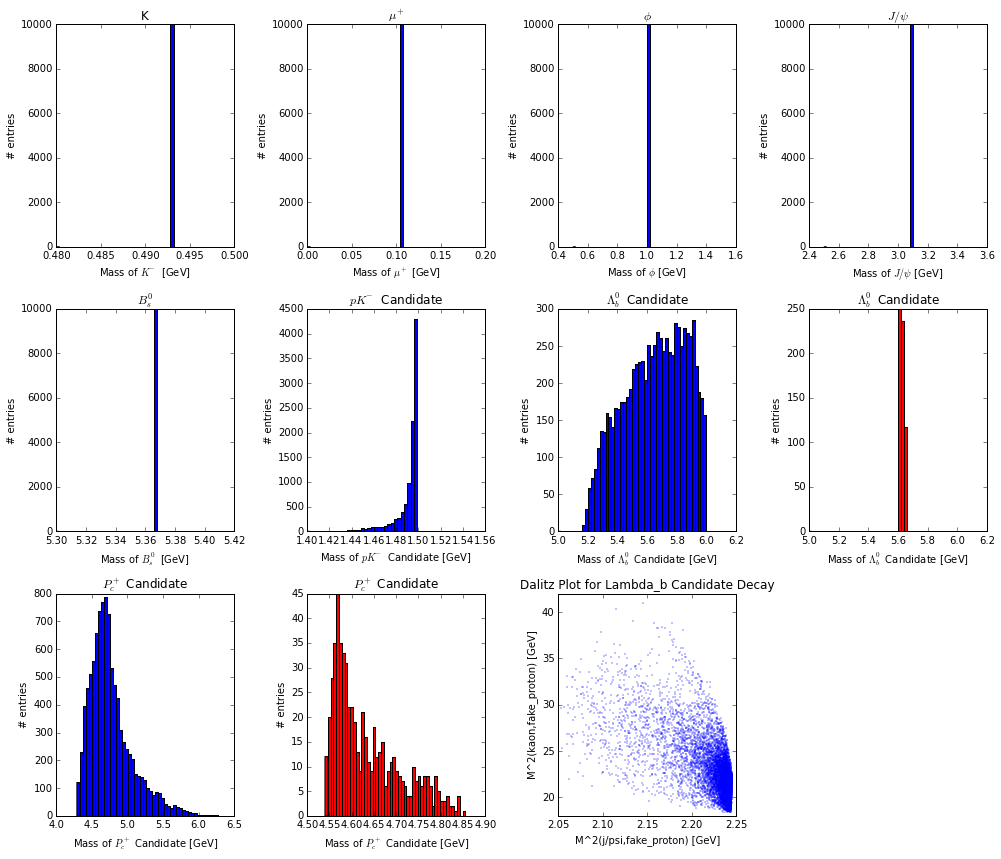

In [26]:
plt.figure(figsize=(14,12))
plt.subplot(3,4,1)
plt.hist(kaon_mass1,bins=50,range=(0.48,0.5))
plt.title(r'K')
plt.xlabel(r'Mass of $K^-$ [GeV]')
plt.ylabel('# entries')

plt.subplot(3,4,2)
plt.hist(muon_mass1,bins=50,range=(0,0.2))
plt.title(r'$\mu^+$')
plt.xlabel(r'Mass of $\mu^+$ [GeV]')
plt.ylabel('# entries')

plt.subplot(3,4,3)
plt.hist(phi_mass,bins=50,range=(0.5,1.5))
plt.title(r'$\phi$')
plt.xlabel(r'Mass of $\phi$ [GeV]')
plt.ylabel('# entries')

plt.subplot(3,4,4)
plt.hist(jpsi_mass,bins=50,range=(2.5,3.5))
plt.title(r'$J/\psi$')
plt.xlabel(r'Mass of $J/\psi$ [GeV]')
plt.ylabel('# entries')

plt.subplot(3,4,5)
plt.hist(sbm_mass,bins=50,range=(5.3,5.4))
plt.title(r'$B_s^0$')
plt.xlabel(r'Mass of $B_s^0$ [GeV]')
plt.ylabel(r'# entries')

plt.subplot(3,4,6)
plt.hist(fake_phi_mass,bins=50,range=(1.4,1.55))
plt.title(r'$pK^-$ Candidate')
plt.xlabel(r'Mass of $pK^-$ Candidate [GeV]')
plt.ylabel(r'# entries')

plt.subplot(3,4,7)
plt.hist(fake_lambda_b_mass,bins=50,range=(5,6))
plt.title(r'$\Lambda_b^0$ Candidate')
plt.xlabel(r'Mass of $\Lambda_b^0$ Candidate [GeV]')
plt.ylabel(r'# entries')

plt.subplot(3,4,9)
plt.hist(pq_mass,bins=50)
plt.title(r'$P_c^+$ Candidate')
plt.xlabel(r'Mass of $P_c^+$ Candidate [GeV]')
plt.ylabel(r'# entries')

plt.subplot(3,4,11)
plt.plot(x_values,y_values,'b.',alpha=1.0,markersize=1) # Alpha is transparency
plt.xlabel("M^2(j/psi,fake_proton) [GeV]")
plt.ylabel("M^2(kaon,fake_proton) [GeV]")
plt.title("Dalitz Plot for Lambda_b Candidate Decay")
plt.xlim([2.05,2.25])
plt.ylim([18,42])

phi_window = 0.048
jpsi_window = 0.048

index  = fake_phi_mass>1.50-phi_window
index *= fake_phi_mass<1.50+phi_window
index *= fake_lambda_b_mass>5.6
index *= fake_lambda_b_mass<5.65
index *= jpsi_mass>3.096-jpsi_window
index *= jpsi_mass>3.096+jpsi_window

if len(index[index])>0:

    plt.subplot(3,4,8)
    plt.hist(fake_lambda_b_mass[index],bins=50,range=(5,6),color='red')
    plt.title(r'$\Lambda_b^0$ Candidate')
    plt.xlabel(r'Mass of $\Lambda_b^0$ Candidate [GeV]')
    plt.ylabel(r'# entries')
    
    plt.subplot(3,4,10)
    plt.hist(pq_mass[index],bins=50,color='red')
    plt.title(r'$P_c^+$ Candidate')
    plt.xlabel(r'Mass of $P_c^+$ Candidate [GeV]')
    plt.ylabel(r'# entries')
    
    

plt.tight_layout()

There is an ongoing search for a theoretical pentaquark state, called $\theta^--$ which is made of three up antiquarks, one down antiquark, and one strange quark. It is predicted to decay as follows:
$$\theta^-- \rightarrow p + K^-$$
If the above decay is proven, the expected mass is around 1.50 GeV, which is what we measure in the $pK^-$ histogram above. However, the $pK^-$ mass above CANNOT be this theoretical pentaquark state because the "proton" isn't actually a proton!